In [1]:
# Import relevant libraries and packages.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm 
from statsmodels.graphics.api import abline_plot 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split 
from sklearn import linear_model, preprocessing 
import warnings 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

import os 

In [2]:
os.getcwd()

'/Users/yusufsmacbookpro/Desktop/Springboard/Capstone1'

In [3]:
df = pd.read_csv('/Users/yusufsmacbookpro/Desktop/Springboard/Capstone1/start_up_cleaned.csv')

In [4]:
df.head().T

,0,1,2,3,4
state_code,CA,CA,CA,CA,CA
latitude,42.3589,37.2389,32.901,37.3203,37.7793
longitude,-71.0568,-121.974,-117.193,-122.05,-122.419
zip_code,92101,95032,92121,95014,94105
city,San Diego,Los Gatos,San Diego,Cupertino,San Francisco
name,Bandsintown,TriCipher,Plixi,Solidcore Systems,Inhale Digital
labels,1,1,1,1,0
founded_at,2007-01-01,2000-01-01,2009-03-18,2002-01-01,2010-08-01
first_funding_at,2009-04-01,2005-02-14,2010-03-30,2005-02-17,2010-08-01
last_funding_at,2010-01-01,2009-12-28,2010-03-30,2007-04-25,2012-04-01


In [5]:
df.dtypes

state_code                   object
latitude                    float64
longitude                   float64
zip_code                     object
city                         object
name                         object
labels                        int64
founded_at                   object
first_funding_at             object
last_funding_at              object
age_first_funding_year      float64
age_last_funding_year       float64
age_first_milestone_year    float64
age_last_milestone_year     float64
relationships                 int64
funding_rounds                int64
funding_total_usd             int64
milestones                    int64
is_CA                         int64
is_NY                         int64
is_MA                         int64
is_TX                         int64
is_otherstate                 int64
category_code                object
is_software                   int64
is_web                        int64
is_mobile                     int64
is_enterprise               

In [6]:
#we need to convert the colums below from object to datetime
df.founded_at=pd.to_datetime(df.founded_at)
df.first_funding_at=pd.to_datetime(df.first_funding_at)
df.last_funding_at=pd.to_datetime(df.last_funding_at)

df.head(3)

,state_code,latitude,longitude,zip_code,city,name,labels,founded_at,first_funding_at,last_funding_at,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,CA,42.358880,-71.056820,92101,San Diego,Bandsintown,1,2007-01-01,2009-04-01,2010-01-01,...,c:6669,0,1,0,0,0,0,1.00,0,acquired
1,CA,37.238916,-121.973718,95032,Los Gatos,TriCipher,1,2000-01-01,2005-02-14,2009-12-28,...,c:16283,1,0,0,1,1,1,4.75,1,acquired
2,CA,32.901049,-117.192656,92121,San Diego,Plixi,1,2009-03-18,2010-03-30,2010-03-30,...,c:65620,0,0,1,0,0,0,4.00,1,acquired


In [7]:
df.dtypes

state_code                          object
latitude                           float64
longitude                          float64
zip_code                            object
city                                object
name                                object
labels                               int64
founded_at                  datetime64[ns]
first_funding_at            datetime64[ns]
last_funding_at             datetime64[ns]
age_first_funding_year             float64
age_last_funding_year              float64
age_first_milestone_year           float64
age_last_milestone_year            float64
relationships                        int64
funding_rounds                       int64
funding_total_usd                    int64
milestones                           int64
is_CA                                int64
is_NY                                int64
is_MA                                int64
is_TX                                int64
is_otherstate                        int64
category_co

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 922 entries, 0 to 921
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   state_code                922 non-null    object        
 1   latitude                  922 non-null    float64       
 2   longitude                 922 non-null    float64       
 3   zip_code                  922 non-null    object        
 4   city                      922 non-null    object        
 5   name                      922 non-null    object        
 6   labels                    922 non-null    int64         
 7   founded_at                922 non-null    datetime64[ns]
 8   first_funding_at          922 non-null    datetime64[ns]
 9   last_funding_at           922 non-null    datetime64[ns]
 10  age_first_funding_year    922 non-null    float64       
 11  age_last_funding_year     922 non-null    float64       
 12  age_first_milestone_ye

In [9]:
df.shape

(922, 44)

In [10]:
#we see missing values for age first milestone year and age last milestone year so we're going to fill with mean()
df["age_first_milestone_year"].fillna((df["age_first_milestone_year"].mean()), inplace=True)
df["age_last_milestone_year"].fillna((df["age_last_milestone_year"].mean()), inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 922 entries, 0 to 921
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   state_code                922 non-null    object        
 1   latitude                  922 non-null    float64       
 2   longitude                 922 non-null    float64       
 3   zip_code                  922 non-null    object        
 4   city                      922 non-null    object        
 5   name                      922 non-null    object        
 6   labels                    922 non-null    int64         
 7   founded_at                922 non-null    datetime64[ns]
 8   first_funding_at          922 non-null    datetime64[ns]
 9   last_funding_at           922 non-null    datetime64[ns]
 10  age_first_funding_year    922 non-null    float64       
 11  age_last_funding_year     922 non-null    float64       
 12  age_first_milestone_ye

In [12]:
#since were trying to predict the outcome, were going to drop the actual and replace them with dummie results for now
df=pd.get_dummies(df, columns=["status"], drop_first=True)
df.head(10).T


,0,1,2,3,4,5,6,7,8,9
state_code,CA,CA,CA,CA,CA,CA,CA,CA,MA,CA
latitude,42.3589,37.2389,32.901,37.3203,37.7793,37.4069,37.3916,38.0571,42.7122,37.4272
longitude,-71.0568,-121.974,-117.193,-122.05,-122.419,-122.09,-122.07,-122.514,-73.2036,-122.146
zip_code,92101,95032,92121,95014,94105,94043,94041,94901,1267,94306
city,San Diego,Los Gatos,San Diego,Cupertino,San Francisco,Mountain View,Mountain View,San Rafael,Williamstown,Palo Alto
name,Bandsintown,TriCipher,Plixi,Solidcore Systems,Inhale Digital,Matisse Networks,RingCube Technologies,ClairMail,VoodooVox,Doostang
labels,1,1,1,1,0,0,1,1,1,1
founded_at,2007-01-01 00:00:00,2000-01-01 00:00:00,2009-03-18 00:00:00,2002-01-01 00:00:00,2010-08-01 00:00:00,2002-01-01 00:00:00,2005-01-01 00:00:00,2004-01-01 00:00:00,2002-01-01 00:00:00,2005-06-01 00:00:00
first_funding_at,2009-04-01 00:00:00,2005-02-14 00:00:00,2010-03-30 00:00:00,2005-02-17 00:00:00,2010-08-01 00:00:00,2006-07-18 00:00:00,2006-09-21 00:00:00,2005-08-24 00:00:00,2005-08-02 00:00:00,2007-02-01 00:00:00
last_funding_at,2010-01-01 00:00:00,2009-12-28 00:00:00,2010-03-30 00:00:00,2007-04-25 00:00:00,2012-04-01 00:00:00,2006-07-18 00:00:00,2010-03-18 00:00:00,2010-10-04 00:00:00,2013-02-08 00:00:00,2010-02-05 00:00:00


In [13]:
df.drop(['latitude', 'longitude', 'zip_code', 'city', 'labels', 'object_id', 'is_top500'], axis=1, inplace=True)

In [14]:
df.head().T

,0,1,2,3,4
state_code,CA,CA,CA,CA,CA
name,Bandsintown,TriCipher,Plixi,Solidcore Systems,Inhale Digital
founded_at,2007-01-01 00:00:00,2000-01-01 00:00:00,2009-03-18 00:00:00,2002-01-01 00:00:00,2010-08-01 00:00:00
first_funding_at,2009-04-01 00:00:00,2005-02-14 00:00:00,2010-03-30 00:00:00,2005-02-17 00:00:00,2010-08-01 00:00:00
last_funding_at,2010-01-01 00:00:00,2009-12-28 00:00:00,2010-03-30 00:00:00,2007-04-25 00:00:00,2012-04-01 00:00:00
age_first_funding_year,2.2493,5.126,1.0329,3.1315,0
age_last_funding_year,3.0027,9.9973,1.0329,5.3151,1.6685
age_first_milestone_year,4.6685,7.0055,1.4575,6.0027,0.0384
age_last_milestone_year,6.7041,7.0055,2.2055,6.0027,0.0384
relationships,3,9,5,5,2


In [15]:
df = df.round(decimals=2)

In [16]:
df.head().T

,0,1,2,3,4
state_code,CA,CA,CA,CA,CA
name,Bandsintown,TriCipher,Plixi,Solidcore Systems,Inhale Digital
founded_at,2007-01-01 00:00:00,2000-01-01 00:00:00,2009-03-18 00:00:00,2002-01-01 00:00:00,2010-08-01 00:00:00
first_funding_at,2009-04-01 00:00:00,2005-02-14 00:00:00,2010-03-30 00:00:00,2005-02-17 00:00:00,2010-08-01 00:00:00
last_funding_at,2010-01-01 00:00:00,2009-12-28 00:00:00,2010-03-30 00:00:00,2007-04-25 00:00:00,2012-04-01 00:00:00
age_first_funding_year,2.25,5.13,1.03,3.13,0
age_last_funding_year,3,10,1.03,5.32,1.67
age_first_milestone_year,4.67,7.01,1.46,6,0.04
age_last_milestone_year,6.7,7.01,2.21,6,0.04
relationships,3,9,5,5,2


In [17]:
from pycaret.classification import *

In [18]:
X=df.drop(["first_funding_at","last_funding_at"], axis=1)
y=df.status_closed

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [21]:
clf1 = setup(data = X_train, 
             target = 'status_closed',
             numeric_imputation = 'mean',
             categorical_features = ['state_code','category_code'], 
             ignore_features = ['founded_at'],
             silent = True)

,Description,Value
0,session_id,7366
1,Target,status_closed
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(645, 35)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,26
8,Ordinal Features,False
9,High Cardinality Features,False


In [22]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.7695,0.7991,0.5154,0.8118,0.6199,0.4672,0.4985,1.4600
gbc,Gradient Boosting Classifier,0.7629,0.7977,0.5507,0.7538,0.6267,0.4609,0.4787,0.0750
rf,Random Forest Classifier,0.7585,0.7842,0.4974,0.7782,0.5945,0.4386,0.4662,0.0810
lightgbm,Light Gradient Boosting Machine,0.7473,0.7770,0.5809,0.6977,0.6242,0.4387,0.4493,0.0220
et,Extra Trees Classifier,0.7363,0.7540,0.4364,0.7487,0.5454,0.3795,0.4095,0.0770
ada,Ada Boost Classifier,0.7361,0.7660,0.5886,0.6747,0.6187,0.4205,0.4306,0.0450
dt,Decision Tree Classifier,0.6741,0.6494,0.5522,0.5640,0.5532,0.2986,0.3020,0.0100
knn,K Neighbors Classifier,0.6409,0.6443,0.4092,0.5155,0.4473,0.1932,0.1979,0.0130
lr,Logistic Regression,0.6297,0.6531,0.0000,0.0000,0.0000,0.0000,0.0000,0.3710
svm,SVM - Linear Kernel,0.6297,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0090


In [23]:
#lets create a CatBoost Model
catboost  = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7174,0.7525,0.3529,0.7500,0.4800,0.3189,0.3616
1,0.7333,0.7668,0.4118,0.7778,0.5385,0.3750,0.4125
2,0.8000,0.7479,0.5294,0.9000,0.6667,0.5371,0.5757
3,0.7111,0.7899,0.4706,0.6667,0.5517,0.3478,0.3593
4,0.8222,0.8655,0.5294,1.0000,0.6923,0.5833,0.6417
5,0.7556,0.8634,0.5882,0.7143,0.6452,0.4614,0.4664
6,0.7556,0.8214,0.6471,0.6875,0.6667,0.4740,0.4745
7,0.8000,0.8082,0.5000,0.8889,0.6400,0.5161,0.5571
8,0.8000,0.7866,0.4375,1.0000,0.6087,0.5006,0.5778
9,0.8000,0.7888,0.6875,0.7333,0.7097,0.5574,0.5581


In [24]:
#Lets tune our model
tuned_gbc = tune_model(catboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7174,0.7525,0.3529,0.7500,0.4800,0.3189,0.3616
1,0.6889,0.7248,0.4118,0.6364,0.5000,0.2889,0.3034
2,0.8000,0.7584,0.5882,0.8333,0.6897,0.5485,0.5666
3,0.7333,0.7773,0.4706,0.7273,0.5714,0.3905,0.4100
4,0.8000,0.8466,0.5882,0.8333,0.6897,0.5485,0.5666
5,0.8000,0.8592,0.7059,0.7500,0.7273,0.5696,0.5703
6,0.8000,0.8193,0.7059,0.7500,0.7273,0.5696,0.5703
7,0.7778,0.8039,0.6250,0.7143,0.6667,0.5011,0.5036
8,0.7778,0.7823,0.5000,0.8000,0.6154,0.4706,0.4963
9,0.7556,0.8125,0.6250,0.6667,0.6452,0.4590,0.4596


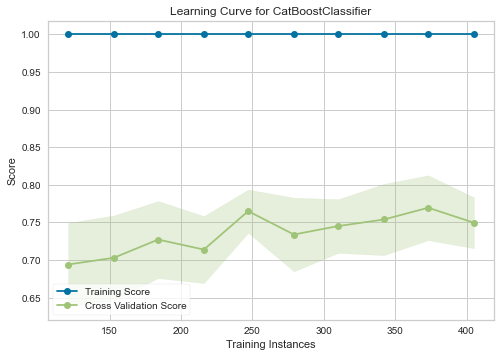

In [25]:
#learning curve
plot_model(estimator = tuned_gbc, plot = 'learning')

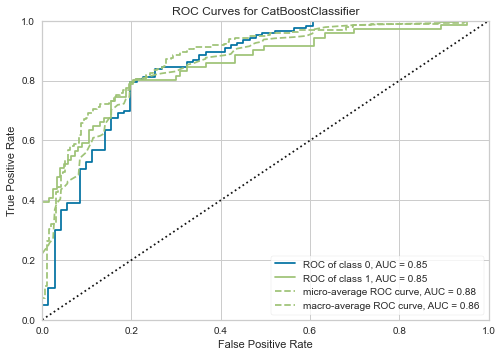

In [26]:
#AUC curve
plot_model(estimator = tuned_gbc, plot = 'auc')


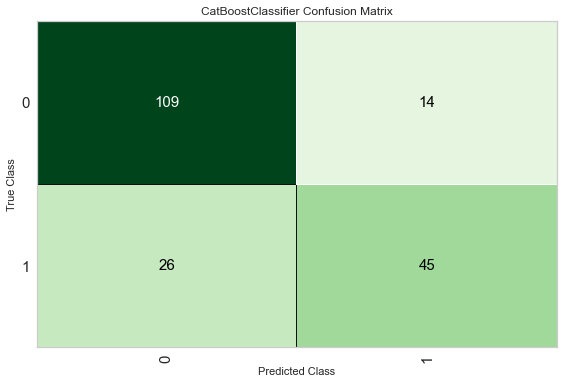

In [27]:
#Confusion Matrix
plot_model(estimator = tuned_gbc, plot = 'confusion_matrix')

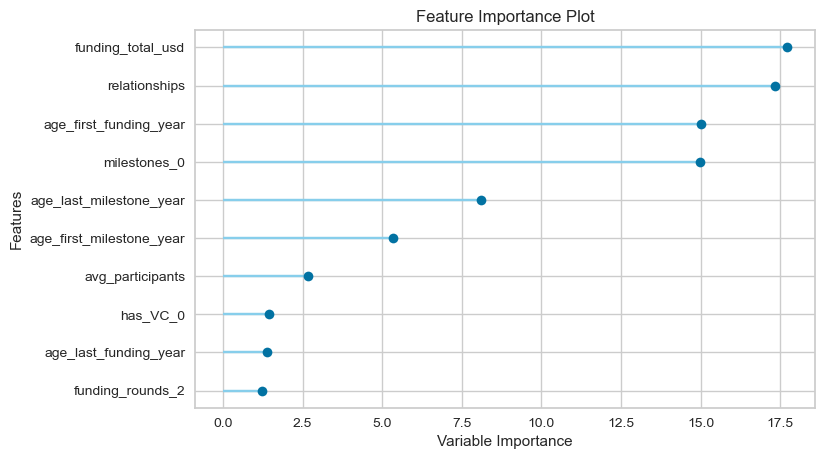

In [28]:
#feature importance
plot_model(estimator = tuned_gbc, plot = 'feature')

In [29]:
#evaluating the whole thing
evaluate_model(tuned_gbc)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

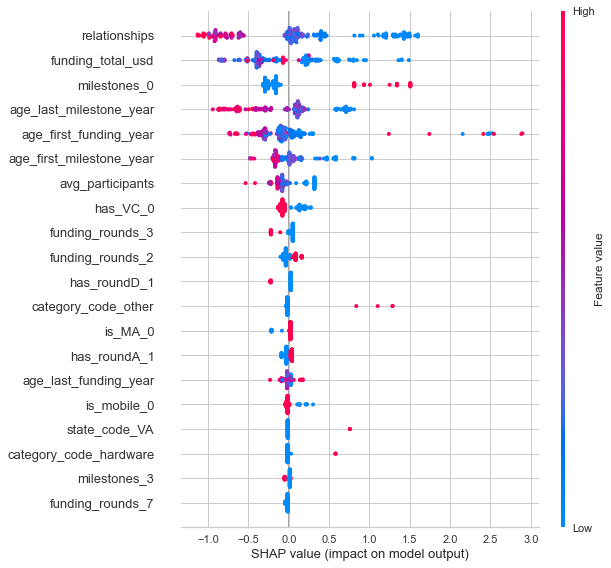

In [30]:
#interpreting the model
interpret_model(tuned_gbc)

In [31]:
predict_model(tuned_gbc, data=X_test)

,state_code,name,founded_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,...,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,status_closed,Label,Score
319,CA,Metaplace,2006-07-01,0.50,3.71,2.99,4.02,5,3,9400000,...,1,0,1,1,0,0,4.0,0,0,0.8035
377,CA,IronPort Systems,2000-01-01,2.48,4.82,5.59,11.95,21,2,61500000,...,0,0,0,1,0,1,4.0,0,0,0.9547
538,CA,Attributor,2005-10-01,0.33,4.69,3.25,4.69,13,4,25200000,...,0,0,1,1,1,1,4.0,0,0,0.9519
296,MA,Vlingo,2006-06-01,0.50,3.30,2.07,7.00,18,3,26500000,...,1,0,1,1,0,0,2.0,0,0,0.9656
531,WA,Million Dollar Earth,2011-03-01,0.02,0.02,0.00,0.00,1,1,30000,...,0,1,0,0,0,0,2.0,1,1,0.9759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,CA,Tapioca Mobile,2008-01-01,-0.33,0.23,3.06,4.76,5,2,5000000,...,1,1,0,0,0,0,1.0,1,1,0.8791
133,CA,Netli,2000-01-01,6.12,6.12,6.01,6.01,9,1,18000000,...,1,0,0,0,0,0,7.0,0,0,0.9523
490,CA,YouTube,2005-02-01,0.75,1.16,2.40,8.84,63,2,11500000,...,0,0,1,1,0,0,1.0,0,0,0.9397
558,NY,Advaliant,2013-04-16,-9.05,-9.05,-6.05,-3.88,6,1,100000,...,0,1,0,0,0,0,1.0,1,1,0.9867


In [32]:
predictions = predict_model(tuned_gbc, data=X_test)
predictions.head()

,state_code,name,founded_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,...,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,status_closed,Label,Score
319,CA,Metaplace,2006-07-01,0.50,3.71,2.99,4.02,5,3,9400000,...,1,0,1,1,0,0,4.0,0,0,0.8035
377,CA,IronPort Systems,2000-01-01,2.48,4.82,5.59,11.95,21,2,61500000,...,0,0,0,1,0,1,4.0,0,0,0.9547
538,CA,Attributor,2005-10-01,0.33,4.69,3.25,4.69,13,4,25200000,...,0,0,1,1,1,1,4.0,0,0,0.9519
296,MA,Vlingo,2006-06-01,0.50,3.30,2.07,7.00,18,3,26500000,...,1,0,1,1,0,0,2.0,0,0,0.9656
531,WA,Million Dollar Earth,2011-03-01,0.02,0.02,0.00,0.00,1,1,30000,...,0,1,0,0,0,0,2.0,1,1,0.9759


In [33]:
sub = round(predictions['Score']).astype(int)
sub.head()

319    1
377    1
538    1
296    1
531    1
Name: Score, dtype: int64

In [48]:
X=df.drop(["state_code","category_code", "first_funding_at","last_funding_at", "founded_at", "name","status_closed"], axis=1)
Y=df.status_closed

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1603)

In [50]:
# Lets go ahead and tune our first Random forrest

#scale data
from sklearn import preprocessing
import numpy as np
# build scaler based on training data and apply it to test data to then also scale the test data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [51]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss
from matplotlib import pyplot

In [72]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=300, random_state = 20000, n_jobs=-1)
model_res = clf.fit(X_train_scaled, y_train)
y_pred = model_res.predict(X_test_scaled)
y_pred_prob = model_res.predict_proba(X_test_scaled)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))


Random Forest: Accuracy=0.769
Random Forest: f1-score=0.759


30


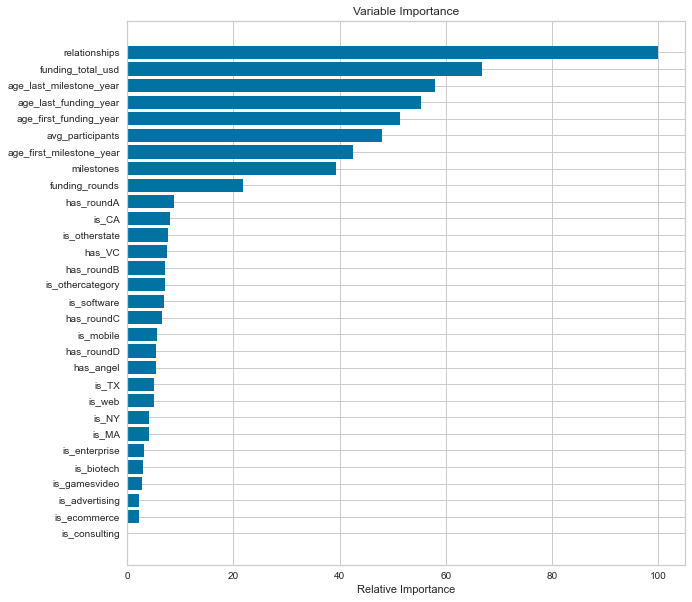

In [73]:
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [75]:
# lets try gradient boost model
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test, y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.727
Accuracy score (validation): 0.646

Learning rate:  0.1
Accuracy score (training): 0.798
Accuracy score (validation): 0.736

Learning rate:  0.25
Accuracy score (training): 0.811
Accuracy score (validation): 0.758

Learning rate:  0.5
Accuracy score (training): 0.822
Accuracy score (validation): 0.722

Learning rate:  0.75
Accuracy score (training): 0.822
Accuracy score (validation): 0.751

Learning rate:  1
Accuracy score (training): 0.826
Accuracy score (validation): 0.726



In [77]:
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [78]:
gb_optimum = GradientBoostingClassifier(n_estimators=20, learning_rate = 0.75, max_features=2, max_depth = 2, random_state = 0)
gb_optimum.fit(X_scaled, y)
y_pred_optimum = gb_optimum.predict(X_scaled)
print(confusion_matrix(y, y_pred_optimum))
print(classification_report(y, y_pred_optimum))

[[548  48]
 [118 208]]
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       596
           1       0.81      0.64      0.71       326

    accuracy                           0.82       922
   macro avg       0.82      0.78      0.79       922
weighted avg       0.82      0.82      0.81       922



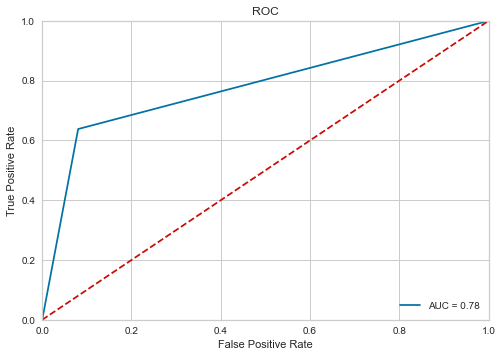

In [79]:
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve
import matplotlib.pyplot as pl

y_pred_1 = gb_optimum.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y, y_pred_optimum)
roc_auc = metrics.auc(fpr, tpr)


plt.title('ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()